In [3]:
#  set base_temperature to the base temperature of the plant.
base_temperature = 10

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature CSV file
df = pd.read_csv('temperature.csv')

Matplotlib is building the font cache; this may take a moment.


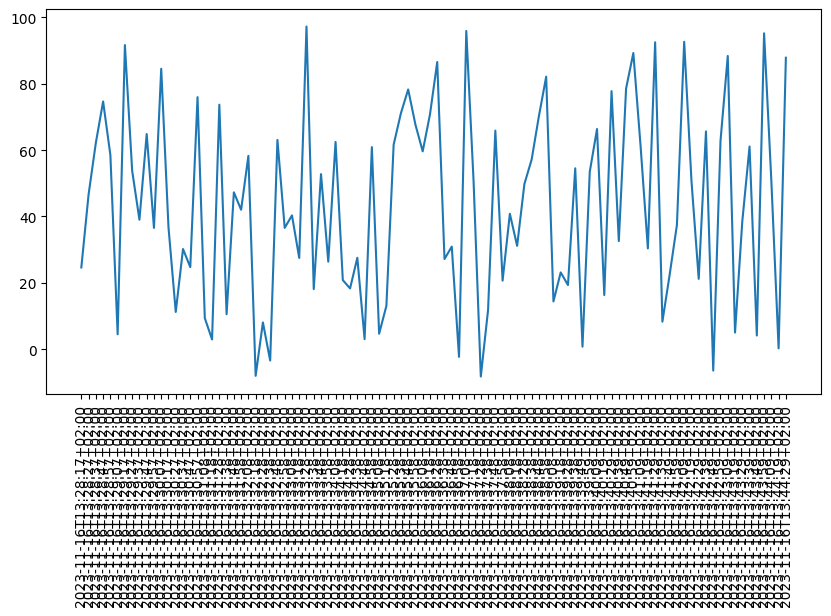

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temperature'])
plt.xticks(rotation='vertical');

In [8]:
# Convert datetimes to pure dates so we can group by the date
df['date'] = pd.to_datetime(df['date']).dt.date
df['date']

0     2023-11-16
1     2023-11-16
2     2023-11-16
3     2023-11-16
4     2023-11-16
         ...    
93    2023-11-16
94    2023-11-16
95    2023-11-16
96    2023-11-16
97    2023-11-16
Name: date, Length: 98, dtype: object

In [9]:
# Group the data by date so it can be analyzed by date
data_by_date = df.groupby('date')
data_by_date.size()

date
2023-11-16    98
dtype: int64

In [10]:
# Get the minimum and maximum temperatures for each date
min_by_date = data_by_date.min()
max_by_date = data_by_date.max()
print('min = ' + str(min_by_date.iloc[0]) + ', max = ' + str(max_by_date.iloc[0]))
# max_by_date.iloc[0]

min = temperature   -8.28
Name: 2023-11-16, dtype: float64, max = temperature    97.23
Name: 2023-11-16, dtype: float64


In [11]:
# Join the min and max temperatures into one dataframe and flatten it
min_max_by_date = min_by_date.join(max_by_date, on='date', lsuffix='_min', rsuffix='_max')
min_max_by_date = min_max_by_date.reset_index()
min_max_by_date

,date,temperature_min,temperature_max
0,2023-11-16,-8.28,97.23


In [12]:
def calculate_gdd(row):
    return ((row['temperature_max'] + row['temperature_min']) / 2) - base_temperature

# Calculate the GDD for each row
min_max_by_date['gdd'] = min_max_by_date.apply (lambda row: calculate_gdd(row), axis=1)

# Print the results
print(min_max_by_date[['date', 'gdd']].to_string(index=False))

      date    gdd
2023-11-16 34.475
